# Convervation of momentum
# $$m_{1}v_{1i} + m_{2}v_{2i} = m_{1}v_{1f} + m_{2}v_{2f} = const$$
# Conservation of energy
# $$\frac{1}{2}m_{1}v_{1i}^{2} + \frac{1}{2}m_{2}v_{2i}^{2} = \frac{1}{2}m_{1}v_{1f}^{2} + \frac{1}{2}m_{2}v_{2f}^{2} = const$$

## Demonstration
## $$ \frac{m_{1}}{m_{2}}=\frac{ v_{1i} - v_{1f} }{ v_{2f} - v_{2i} } = \frac{ v_{1i}^{2} - v_{1f}^{2} }{ v_{2f}^{2} - v_{2i}^{2} }$$

## $$ \frac{m_{1}}{m_{2}}=\frac{ v_{1i} - v_{1f} }{ v_{1i}^{2} - v_{1f}^{2} } = \frac{ v_{2f} - v_{2i} }{ v_{2f}^{2} - v_{2i}^{2} }$$

## $$ \frac{m_{1}}{m_{2}}=\frac{ v_{1i} - v_{1f} }{ (v_{1i} - v_{1f})(v_{1i} + v_{1f}) } = \frac{ v_{2f} - v_{2i} }{ (v_{2f} - v_{2i})(v_{2f} + v_{2i}) }$$

## $$ m_{1}(v_{1i} + v_{1f}) =  m_{2}(v_{2i} + v_{2f})$$

## Set of two equations and two unknowns
## $$ m_{1}v_{1i} + m_{1}v_{1f} =  m_{2}v_{2i} + m_{2}v_{2f}$$
## $$ v_{1i} - v_{1f} =  v_{2f} - v_{2i} \mbox{  (trivial solution)}$$

## making $$ v_{2f} =   v_{1i} - v_{1f} + v_{2i}$$
## and replacing in $$ m_{1}v_{1i} + m_{1}v_{1f} =  m_{2}v_{2i} + m_{2}v_{2f}$$

## we got $$ m_{1}v_{1i} + m_{1}v_{1f} =  m_{2}v_{2i} + m_{2}(v_{1i} - v_{1f} + v_{2i}) \rightarrow $$
## $$ m_{1}v_{1i} + m_{1}v_{1f} =  m_{2}v_{2i} + m_{2}v_{1i} - m_{2}v_{1f} + m_{2}v_{2i} \rightarrow $$
## $$ m_{1}v_{1f} + m_{2}v_{1f} =  2m_{2}v_{2i} + m_{2}v_{1i} - m_{1}v_{1i} \rightarrow $$
## $$ (m_{1} + m_{2})v_{1f} =  2m_{2}v_{2i} + (m_{2} - m_{1})v_{1i} \rightarrow $$

## finally
## $$ v_{1f} =  \frac{ 2m_{2} }{ m_{1} + m_{2} }v_{2i} + \frac{ m_{1} - m_{2} }{ m_{1} + m_{2} }v_{1i} $$

## similarly
## $$ v_{2f} =  \frac{ 2m_{1} }{ m_{1} + m_{2} }v_{1i} + \frac{ m_{2} - m_{1} }{ m_{1} + m_{2} }v_{2i} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def collision_b1_b2( m1, m2, v1_init, v2_init ):

    m1_plus_m2  = m1 + m2
    m1_minus_m2 = m1 - m2
    m2_minus_m1 = m2 - m1

    v1_after_collision_b1_b2 = ( 2*m2 / m1_plus_m2 )*v2_init + ( m1_minus_m2 / m1_plus_m2 )*v1_init
    v2_after_collision_b1_b2 = ( 2*m1 / m1_plus_m2 )*v1_init + ( m2_minus_m1 / m1_plus_m2 )*v2_init

    return [v1_after_collision_b1_b2, v2_after_collision_b1_b2]

def collision_b1_wall( v1_after_collision_b1_b2, v2_after_collision_b1_b2 ):
    v1_after_collision_b1_wall = -v1_after_collision_b1_b2
    v2_after_collision_b1_wall = v2_after_collision_b1_b2
    
    return [v1_after_collision_b1_wall, v2_after_collision_b1_wall]

In [3]:
v2_init      = 0
v1_init      = -1

d           = 2
m2          = 1
m1          = 100**(d-1)

n_collisions = 0
v1_v2        = []
# print('initial condition: ',v1_init,v2_init)

while 1:
    
    v1_v2.append([v1_init,v2_init])

    v1, v2        = collision_b1_b2(m1, m2, v1_init,v2_init)
    n_collisions += 1
    v1_v2.append([v1,v2])
    
    if v2 < 0.:
        v2_init, v1_init = collision_b1_wall( v2, v1 )
        n_collisions += 1
    else:
        print('#collisions = ',n_collisions,'\n', '\u03C0 = ', np.pi)
        break
        
    if abs(v2_init) < abs(v1_init):
        print('#collisions = ',n_collisions,'\n', '\u03C0 = ', np.pi)
        break

v1_v2 = np.asarray(v1_v2)

#collisions =  31 
 π =  3.141592653589793


In [4]:
print(v1_v2.shape)

(32, 2)


In [5]:
radius   = (np.sqrt(m1)*v1_v2[:,0]).max()
x_circle = radius*np.cos( np.linspace(0,2*np.pi, v1_v2.size) ) 
y_circle = radius*np.sin( np.linspace(0,2*np.pi, v1_v2.size) ) 

In [6]:
xlimit = [(np.sqrt(m1)*v1_v2[:,0]).min().round(), (np.sqrt(m1)*v1_v2[:,0]).max().round()]
ylimit = [(np.sqrt(m2)*v1_v2[:,1]).min().round(), (np.sqrt(m2)*v1_v2[:,1]).max().round()]

def set_axis(ax):
    fs = 20
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data', 0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data', 0))
    
    ax.set_xticks([xlimit[0],0,xlimit[1]])
    ax.set_yticks([ylimit[0],0,ylimit[1]])
    
    ax.yaxis.set_label_coords(0.5,1.1)
    ax.xaxis.set_label_coords(1.1,0.5)
        
    ax.set_xlabel(r"$x=\sqrt{m_{1}}v_{1}$", fontsize=fs)
    ax.set_ylabel(r"$y=\sqrt{m_{2}}v_{2}$", fontsize=fs)
    ax.tick_params(labelsize=fs)

### Phase diagram

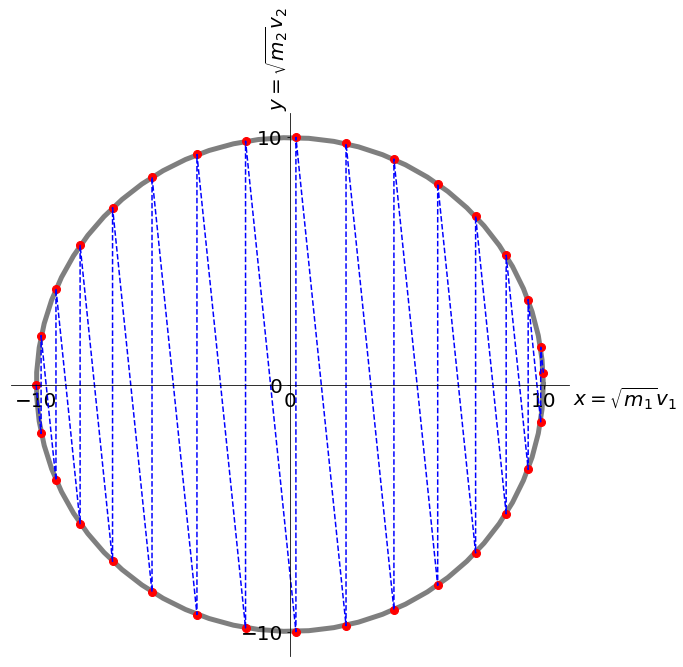

In [7]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(x_circle,y_circle, '-k', lw=5, alpha=.5)

ax.plot(np.sqrt(m1)*v1_v2[:,0],np.sqrt(m2)*v1_v2[:,1],'or',ms=8)
ax.plot(np.sqrt(m1)*v1_v2[:,0],np.sqrt(m2)*v1_v2[:,1],'--b')

# ax.plot(np.sqrt(m2)*v1_v2[::2,1],np.sqrt(m1)*v1_v2[::2,0],'--k')
# ax.plot(np.sqrt(m2)*v1_v2[1::2,1],np.sqrt(m1)*v1_v2[1::2,0],'--k')

set_axis(ax)

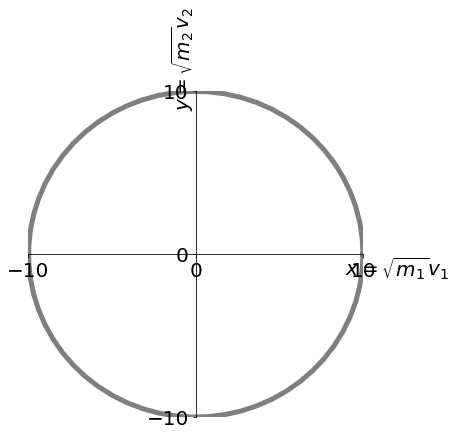

In [130]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(xlimit)
ax.set_ylim(ylimit)
ax.plot(x_circle,y_circle, '-k', lw=5, alpha=.5)
set_axis(ax)

line,  = ax.plot([], [], 
                 '--', 
                 marker='o',
                 markerfacecolor='r',
                 color='b', 
                 ms=8)

In [131]:
# initialization function: plot the background of each frame
def init():
    dots.set_data([], [])
    lines.set_data([], [])
    return (line,)

In [132]:
# animation function. This is called sequentially
def animate(i):
    if i < v1_v2[:,0].shape[0]:
        x = np.sqrt(m1)*v1_v2[:i,0]
        y = np.sqrt(m2)*v1_v2[:i,1]
        line.set_data(x, y)
    return (line,)

In [133]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=500, blit=True)

In [134]:
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
HTML(anim.to_html5_video())